## Mandelbrot Set

References: [Wikipedia](https://www.wikiwand.com/en/Mandelbrot_set) | [Numberphile](https://www.youtube.com/watch?v=FFftmWSzgmk)

In [1]:
import seaborn as sns
import numpy as np

In [2]:
class Complex:
    
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
    
    def __str__(self):
        return f"{self.real} + i{self.imag}"
    
    def square(self):
        _real = (self.real ** 2) - (self.imag ** 2)
        _imag = 2 * self.real * self.imag
        return Complex(_real, _imag)
    
    def plus(self, c2):
        return Complex(self.real + c2.real, self.imag + c2.imag)


In [3]:
class Mandelbrot:
    
    def __init__(self, c, curr=Complex(0, 0)):
        assert isinstance(c, Complex), f"{c} is not a valid input. Input needs to be of type class Complex"
        assert isinstance(curr, Complex), f"{curr} is not a valid input. Input needs to be of type class Complex"
        self.c = c
        self.curr = curr
        self.next = self.curr.square().plus(self.c)
    
    def __str__(self):
        return f"{self.curr.real} + i{self.curr.imag}"
    
    def next_val(self):
        return Mandelbrot(self.c, self.next)
    
    def is_stable(self):
        return (self.curr.real ** 2 + self.curr.imag ** 2) <= 4


In [4]:
def plot_mandelbrot(resolution=0.005, max_iter=200):
    pts = []
    for x in np.arange(-2, 2, resolution):
        for y in np.arange(-2, 2, resolution):
            c = Complex(x, y)
            mandelbrot_val = Mandelbrot(c)
            for iter in range(1, max_iter+1):
                _next_val = mandelbrot_val.next_val()
                if not _next_val.is_stable():
                    break
                mandelbrot_val = _next_val
                if iter == max_iter:
                    pts.append(c)
    x_val = [item.real for item in pts]
    y_val = [item.imag for item in pts]

    sns.set(rc={'figure.figsize':(12, 12)})
    sns.scatterplot(x_val, y_val)

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


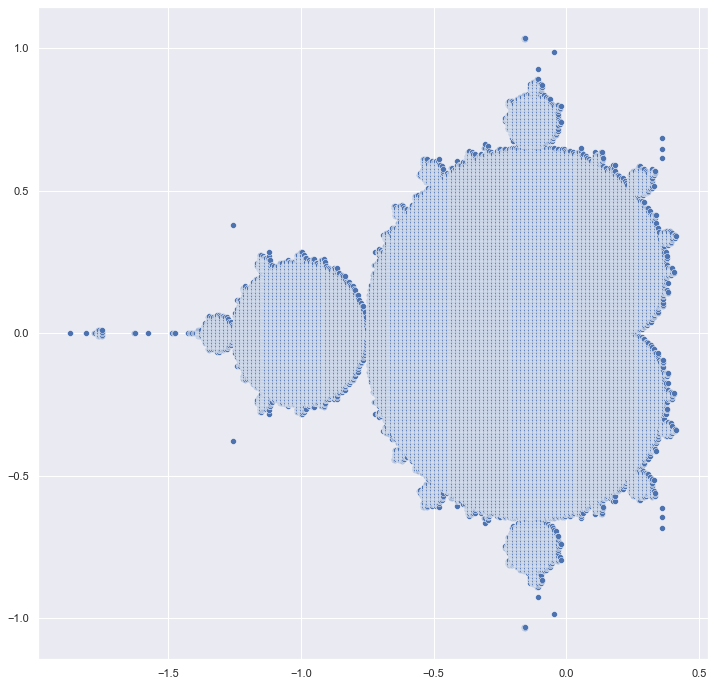

In [5]:
plot_mandelbrot()